In [88]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [89]:
df = pd.read_csv('diamonds.csv')
df.head()

,Unnamed: 0,quilates,corte,color,claridad,profundidad,mesa,precio,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


las columnas que tenemos son
- Unnamed: 0: variable tipo index, seguramente podemos eliminarla.
- quilates: es un indicador de peso, equivale a 200 miligramos
- corte: es un indicador de como fue cortado, mejor corte implica mejor refraccion
- color: es de mas cristalino a mas amarillento
- claridad: indica la cantidad de inclusiones 
- profundidad: es el % de altura a la corona respecto de la altura total
- mesa: es el % de ancho de la tapa respecto al ancho de la corona
- x,y,z: dimensiones largo, ancho y alto.

Me interesa el valor/precio de un diamante, quiero saber como afectan las demas variables a esta. A futuro podría estimar el valor a partir de las variables.



https://ar.pinterest.com/pin/299982025151450686/
La corona es la parte más ancha del diamante.

In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   53940 non-null  int64  
 1   quilates     53940 non-null  float64
 2   corte        53940 non-null  object 
 3   color        53940 non-null  object 
 4   claridad     53940 non-null  object 
 5   profundidad  53940 non-null  float64
 6   mesa         53940 non-null  float64
 7   precio       53940 non-null  int64  
 8   x            53940 non-null  float64
 9   y            53940 non-null  float64
 10  z            53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


No vemos nulls en el data set. vemos variables objeto, enteras y flotantes, logicamente asignadas.

In [91]:
df['color'].unique()

array(['E', 'I', 'J', 'H', 'F', 'G', 'D'], dtype=object)

El color va de en orden alfabetico de D a Z, siendo D lo más claro/traslucido y Z lo más amarillento.
Cuanto más traslucido, mayor precio. Es variable ordinal.

In [92]:
df['claridad'].unique()

array(['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF'],
      dtype=object)

La claridad varia, de diamantes sin inclusiones a diamantes con muchas inclusiones.
A mayores imperfecciones, menor precio. Es variable ordinal.

In [93]:
df['corte'].unique()

array(['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'], dtype=object)

Corte es una variable ordinal. Influye en el precio.

Eliminamos columna Unnamed

In [94]:
df = df.drop(['Unnamed: 0'], axis = 1)
df.head()

,quilates,corte,color,claridad,profundidad,mesa,precio,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [95]:
df.describe()

,quilates,profundidad,mesa,precio,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


1. Ya en quilates se ve un valor extremo en el máximo.
2. en profundidad se observa un desvio tambien en el maximo.
3. en mesa tambien muy lejos de la media y varias desviaciones standard mas lejos
4. el precio se lo ve más variable, pero con un maximo lejano
5. las dimensiones x, y, z se ven homogéneas, con poca desviación. Se observa máximo lejano y valor mínimo 0. Eso no tiene sentido. Podría ser un dato nulo. 

Lo que se ve alejado de la media bien podría ser un dato real, pero definitivamente outlier respecto a lo que hace a la homogeneidad del grupo de datos. Analicemos más en profundidad.

1. quilates: variable numerica continua (discretizada por ser int)
2. corte: variable categórica ordinal.
3. color: variable categorica ordinal.
4. claridad: variable categorica ordinal.
5. profundidad: variable numerica continua
6. mesa: variable numerica continua
7. precio: variable numerica continua (pero discretizada por ser int)
8. x: es continua
9. y: continua
10. z: continua

Investigamos los ceros.

In [96]:
print((df['x']==0).sum()/len(df)*100)
print((df['y']==0).sum()/len(df)*100)
print((df['z']==0).sum()/len(df)*100)

0.014831294030404153
0.012977382276603633
0.03707823507601038


Los porcentajes son despreciables en 54mil filas, elimino para no complicarme.
Empiezo por los 20 z que son cero

In [97]:
df = df[df['z'] != 0]
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 53920 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   quilates     53920 non-null  float64
 1   corte        53920 non-null  object 
 2   color        53920 non-null  object 
 3   claridad     53920 non-null  object 
 4   profundidad  53920 non-null  float64
 5   mesa         53920 non-null  float64
 6   precio       53920 non-null  int64  
 7   x            53920 non-null  float64
 8   y            53920 non-null  float64
 9   z            53920 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.5+ MB


In [98]:
print((df['x']==0).sum()/len(df)*100)
print((df['y']==0).sum()/len(df)*100)
print((df['z']==0).sum()/len(df)*100)

0.0
0.0
0.0


Eliminamos 20 filas, y se fueron los x e y cero.

Ahora a evaluar la distribucion de las variables. Primero las categoricas.

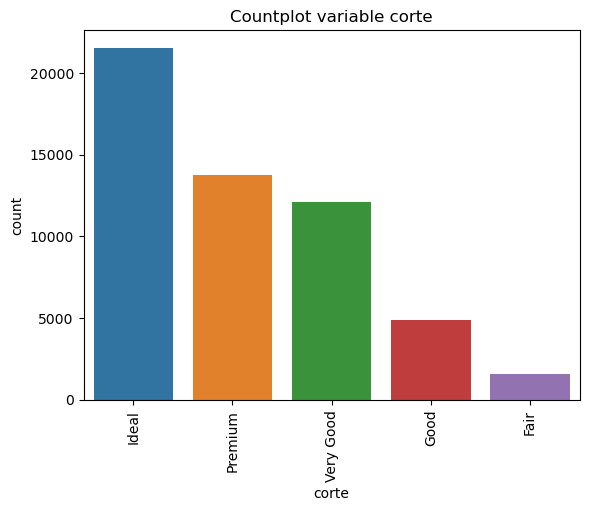

In [99]:
fig = plt.figure()
ax = plt.axes()
ax = sns.countplot(x='corte', data=df, order=df.corte.value_counts().index)
plt.xticks(rotation=90)
plt.title("Countplot variable corte")
plt.show()

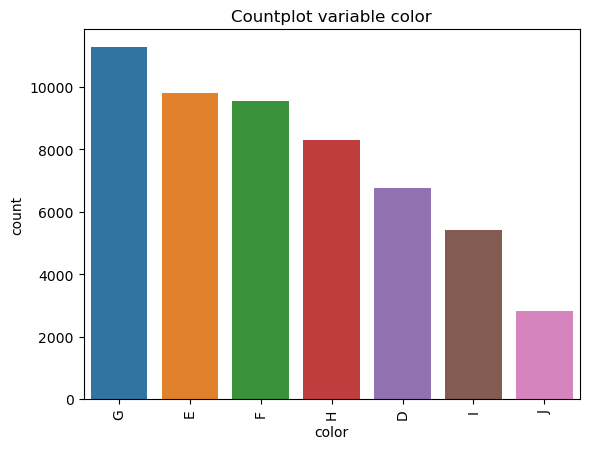

In [100]:
fig = plt.figure()
ax = plt.axes()
ax = sns.countplot(x='color', data=df, order=df.color.value_counts().index)
plt.xticks(rotation=90)
plt.title("Countplot variable color")
plt.show()

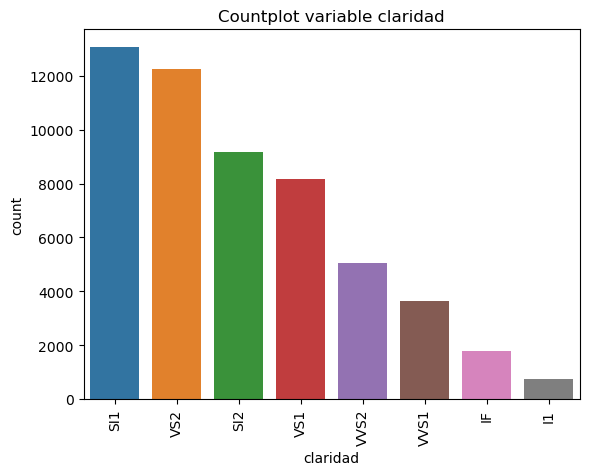

In [101]:
fig = plt.figure()
ax = plt.axes()
ax = sns.countplot(x='claridad', data=df, order=df.claridad.value_counts().index)
plt.xticks(rotation=90)
plt.title("Countplot variable claridad")
plt.show()

Se nota que hay valores que predominan, y otros que aparecen pocas veces. 
Está OK, en proporciones razonables, no se ve nada raro.

ahora a estudiar las numericas

C:\Users\Gustavo\AppData\Local\Temp\ipykernel_17132\500802061.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['quilates'])


<Axes: xlabel='quilates', ylabel='Density'>

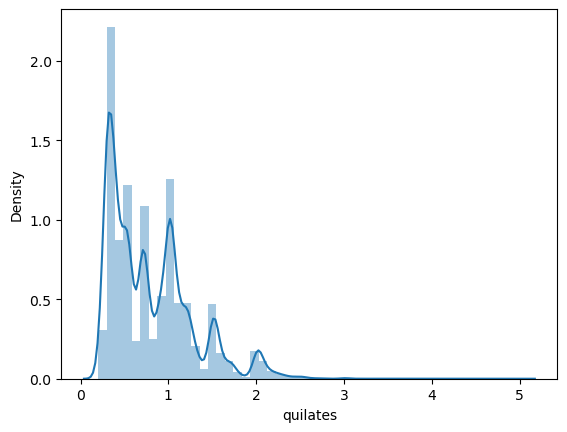

In [102]:
sns.distplot(df['quilates'])

Se ven valores muy extremos, hasta 1,5 o 2 quilates parece razonable. A ver boxplot

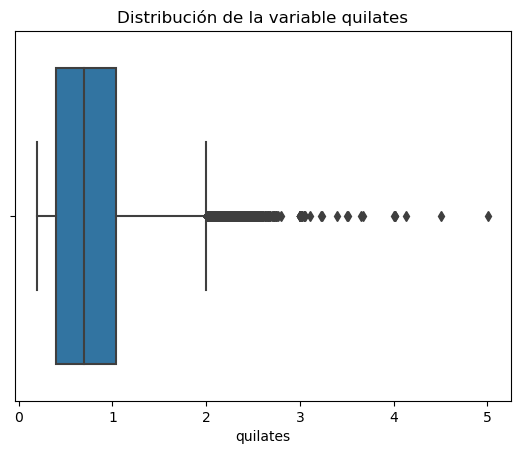

In [103]:
fig = plt.figure()
ax = plt.axes()
ax = sns.boxplot(x=df.quilates)
ax.set_title("Distribución de la variable quilates")
plt.show()

Podria filtrar hasta el dos, quedarme con el data set que tenga hasta 2 quilates.


In [104]:
df_filtrado = df[df.quilates < 2]
df_filtrado

,quilates,corte,color,claridad,profundidad,mesa,precio,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


Sigo teniendo la mayoria de datos.

In [105]:
df_filtrado.describe()

,quilates,profundidad,mesa,precio,x,y,z
count,51772.000000,51772.000000,51772.000000,51772.000000,51772.000000,51772.000000,51772.000000
mean,0.742241,61.746357,57.421467,3478.448254,5.627726,5.631126,3.475900
std,0.393002,1.411334,2.219793,3331.986376,1.015150,1.015132,0.639579
min,0.200000,43.000000,43.000000,326.000000,3.730000,3.680000,1.070000
25%,0.390000,61.100000,56.000000,924.000000,4.690000,4.700000,2.890000
50%,0.700000,61.800000,57.000000,2268.000000,5.650000,5.650000,3.480000
75%,1.020000,62.500000,59.000000,4904.250000,6.470000,6.470000,4.000000
max,1.990000,79.000000,79.000000,18806.000000,8.280000,31.800000,31.800000


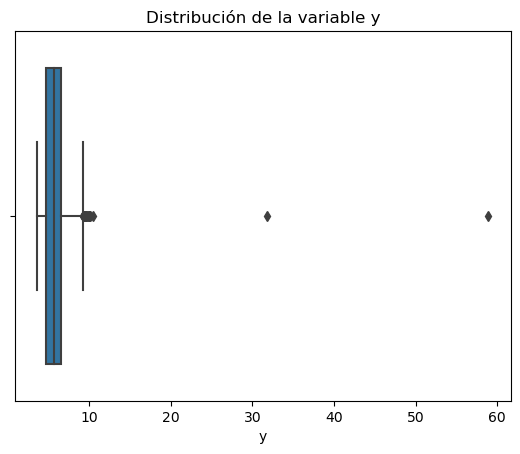

In [106]:
fig = plt.figure()
ax = plt.axes()
ax = sns.boxplot(x=df.y)
ax.set_title("Distribución de la variable y")
plt.show()

hagamos los 3 sigmas

In [107]:
min = df['y'].mean() - 2*df['y'].std()
max = df['y'].mean() + 2*df['y'].std()

df_filtrado = df_filtrado[(df_filtrado.y > min) & (df_filtrado.y < max)]
df_filtrado.describe()

,quilates,profundidad,mesa,precio,x,y,z
count,51745.000000,51745.00000,51745.000000,51745.000000,51745.000000,51745.000000,51745.000000
mean,0.741657,61.74728,57.420875,3473.487081,5.626509,5.629385,3.475184
std,0.392224,1.41065,2.218938,3324.622329,1.013935,1.007352,0.638970
min,0.200000,43.00000,43.000000,326.000000,3.730000,3.680000,1.070000
25%,0.390000,61.10000,56.000000,924.000000,4.690000,4.700000,2.890000
50%,0.700000,61.80000,57.000000,2266.000000,5.640000,5.650000,3.480000
75%,1.020000,62.50000,59.000000,4899.000000,6.470000,6.470000,4.000000
max,1.980000,79.00000,79.000000,18806.000000,8.170000,8.010000,31.800000


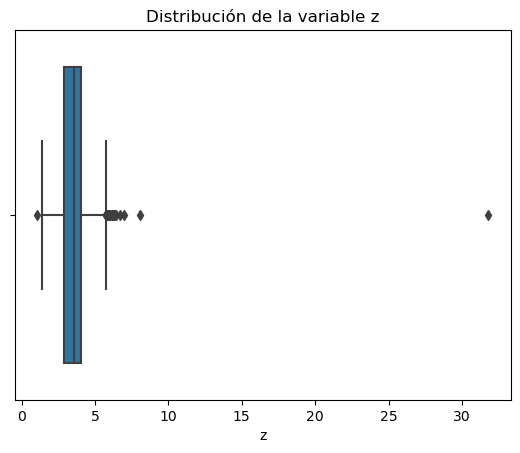

In [86]:
fig = plt.figure()
ax = plt.axes()
ax = sns.boxplot(x=df.z)
ax.set_title("Distribución de la variable z")
plt.show()

In [108]:
min = df['z'].mean() - 3*df['z'].std()
max = df['z'].mean() + 3*df['z'].std()

df_filtrado = df_filtrado[(df_filtrado.z > min) & (df_filtrado.z < max)]
df_filtrado.describe()

,quilates,profundidad,mesa,precio,x,y,z
count,51742.000000,51742.000000,51742.000000,51742.000000,51742.000000,51742.000000,51742.000000
mean,0.741642,61.747321,57.420964,3473.347725,5.626467,5.629343,3.474723
std,0.392220,1.410674,2.218961,3324.580317,1.013926,1.007344,0.626582
min,0.200000,43.000000,43.000000,326.000000,3.730000,3.680000,1.530000
25%,0.390000,61.100000,56.000000,924.000000,4.690000,4.700000,2.890000
50%,0.700000,61.800000,57.000000,2266.000000,5.640000,5.650000,3.480000
75%,1.020000,62.500000,59.000000,4899.000000,6.470000,6.470000,4.000000
max,1.980000,79.000000,79.000000,18806.000000,8.170000,8.010000,5.120000


se fueron 3 filas nomás y ya veo x, y y z con valores más logicos.

Ahora toca reemplazar variables categoricas por numericas (ordinales dijimos) para poder hacer una correlación.

In [110]:
df_filtrado['corte'].replace(['Fair', 'Good', 'Very Good', 'Premium', 'Ideal'],
                        [1, 2, 3, 4, 5], inplace=True)
df_filtrado.head()

,quilates,corte,color,claridad,profundidad,mesa,precio,x,y,z
0,0.23,5,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,4,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,2,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,4,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,2,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [117]:
df_filtrado['color'].replace(['D', 'E', 'F', 'G', 'H', 'I', 'J'],
                        [7, 6, 5, 4, 3, 2, 1], inplace=True)
df_filtrado.head()

,quilates,corte,color,claridad,profundidad,mesa,precio,x,y,z
0,0.23,5,2,7,61.5,55.0,326,3.95,3.98,2.43
1,0.21,4,2,6,59.8,61.0,326,3.89,3.84,2.31
2,0.23,2,2,4,56.9,65.0,327,4.05,4.07,2.31
3,0.29,4,6,5,62.4,58.0,334,4.20,4.23,2.63
4,0.31,2,7,7,63.3,58.0,335,4.34,4.35,2.75


In [118]:
df_filtrado['claridad'].replace(['IF', 'VVS1', 'VVS2', 'VS1', 'VS2', 'SI1', 'SI2', 'I1'],
                        [8, 7, 6, 5, 4, 3, 2, 1], inplace=True)
df_filtrado.head()

,quilates,corte,color,claridad,profundidad,mesa,precio,x,y,z
0,0.23,5,2,7,61.5,55.0,326,3.95,3.98,2.43
1,0.21,4,2,6,59.8,61.0,326,3.89,3.84,2.31
2,0.23,2,2,4,56.9,65.0,327,4.05,4.07,2.31
3,0.29,4,6,5,62.4,58.0,334,4.20,4.23,2.63
4,0.31,2,7,7,63.3,58.0,335,4.34,4.35,2.75


In [119]:
df_filtrado.corr()

,quilates,corte,color,claridad,profundidad,mesa,precio,x,y,z
quilates,1.000000,-0.130280,0.229061,0.316232,0.027753,0.173365,0.901919,0.985250,0.984445,0.983913
corte,-0.130280,1.000000,-0.014191,-0.185699,-0.213196,-0.438103,-0.038182,-0.119005,-0.118618,-0.145965
color,0.229061,-0.014191,1.000000,-0.053376,0.048938,0.013353,0.089475,0.212863,0.212604,0.218022
claridad,0.316232,-0.185699,-0.053376,1.000000,0.066588,0.156093,0.070809,0.337643,0.331687,0.341354
profundidad,0.027753,-0.213196,0.048938,0.066588,1.000000,-0.293064,-0.009832,-0.028244,-0.031435,0.100354
mesa,0.173365,-0.438103,0.013353,0.156093,-0.293064,1.000000,0.105299,0.184578,0.177709,0.142339
precio,0.901919,-0.038182,0.089475,0.070809,-0.009832,0.105299,1.000000,0.868795,0.870770,0.864019
x,0.985250,-0.119005,0.212863,0.337643,-0.028244,0.184578,0.868795,1.000000,0.998402,0.990477
y,0.984445,-0.118618,0.212604,0.331687,-0.031435,0.177709,0.870770,0.998402,1.000000,0.990115
z,0.983913,-0.145965,0.218022,0.341354,0.100354,0.142339,0.864019,0.990477,0.990115,1.000000


Veo mucha relacion entre X, y y Z. Todas afectan a quilates y a precio. Quilates tambien afecta a precio, tiene sentido. 
A mayor tamaño (x,y,z), mayor peso, y por ende mas caro el diamante.

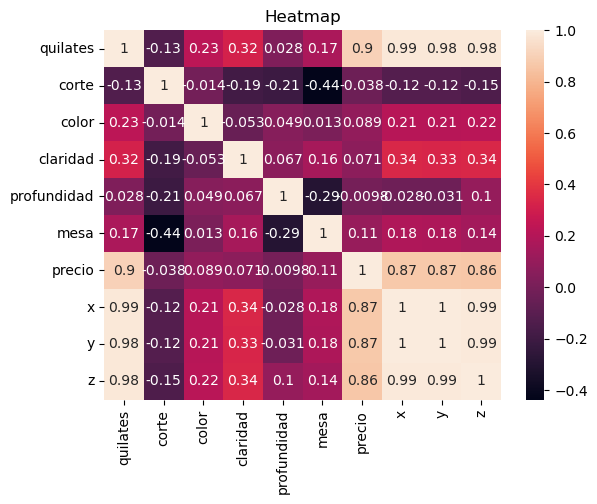

In [120]:
fig = plt.figure()
ax = plt.axes()
ax = sns.heatmap(df_filtrado.corr(), annot = True)
ax.set_title("Heatmap")
plt.show()

La conclusion es que hay una fuerte dependencia del precio en relacion a su peso y tamaño. 
Por supuesto peso y tamaño van de la mano. Los factores como el corte, color y claridad no presentan relacion marcada.

C:\Users\Gustavo\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


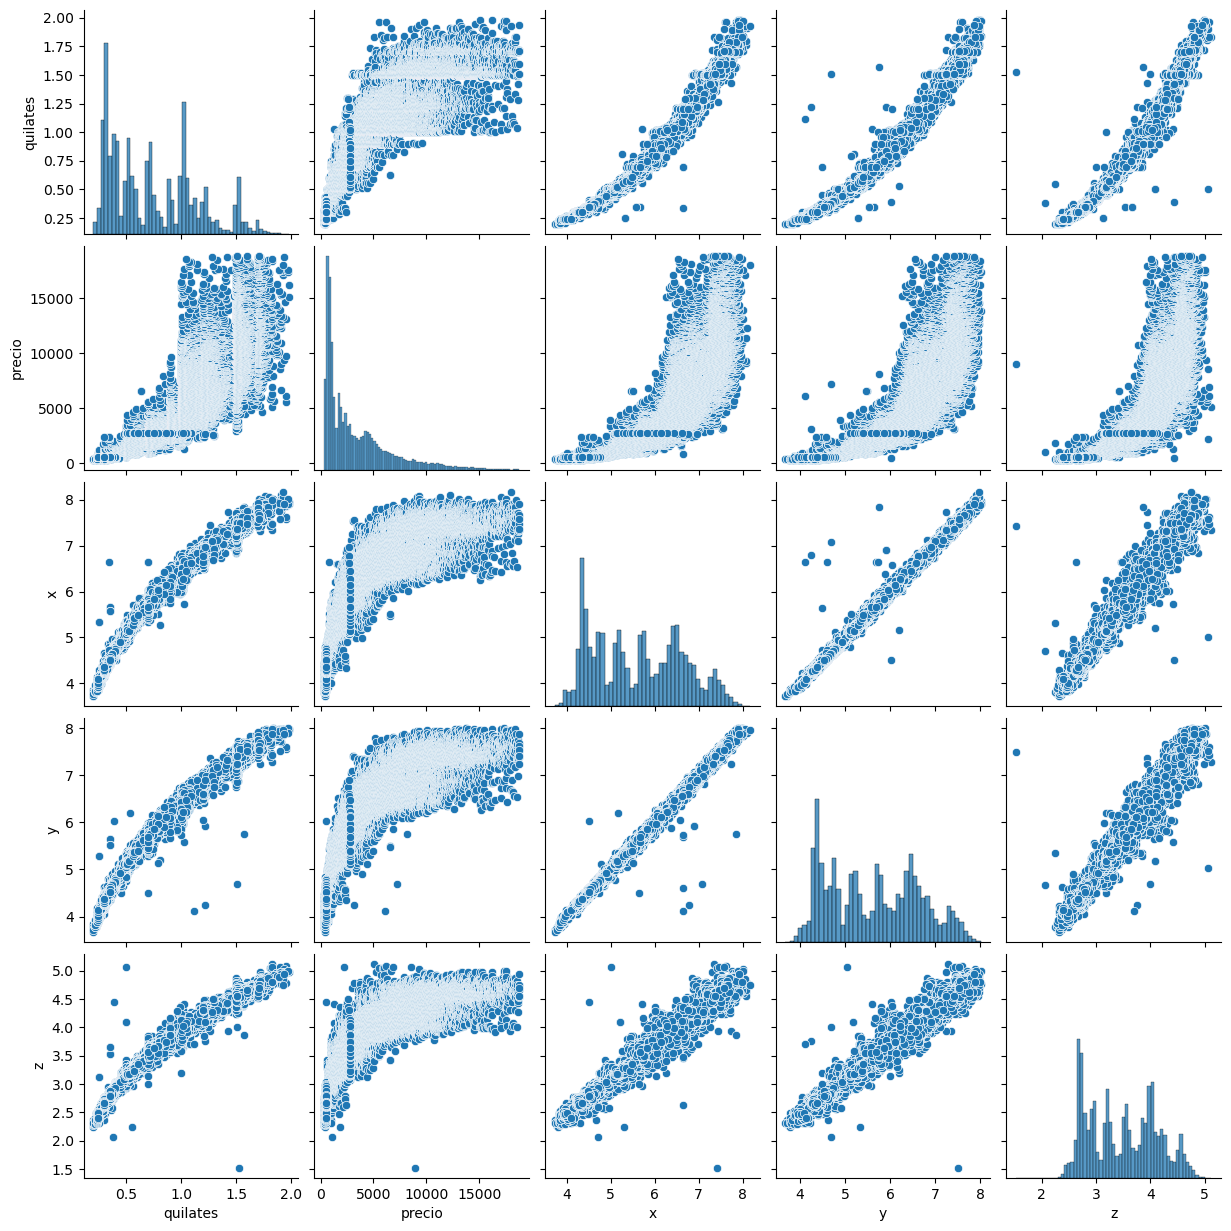

In [121]:
sns.pairplot(data = df_filtrado[['quilates', 'precio', 'x', 'y', 'z']])